In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [21]:
data1 = pd.read_csv("/content/Unemployment in India.csv")
data2 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [22]:
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [24]:
data1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [25]:
data1.shape

(768, 7)

Data Cleaning

In [26]:

data1.columns = data1.columns.str.strip()


In [27]:
# Handling missing values
data1.dropna(inplace=True)

In [28]:
data1.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


Exploratory Data Analysis

<ipython-input-29-b8d2ad202581>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=data1, ci=None, palette="magma")
<ipython-input-29-b8d2ad202581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=data1, ci=None, palette="magma")


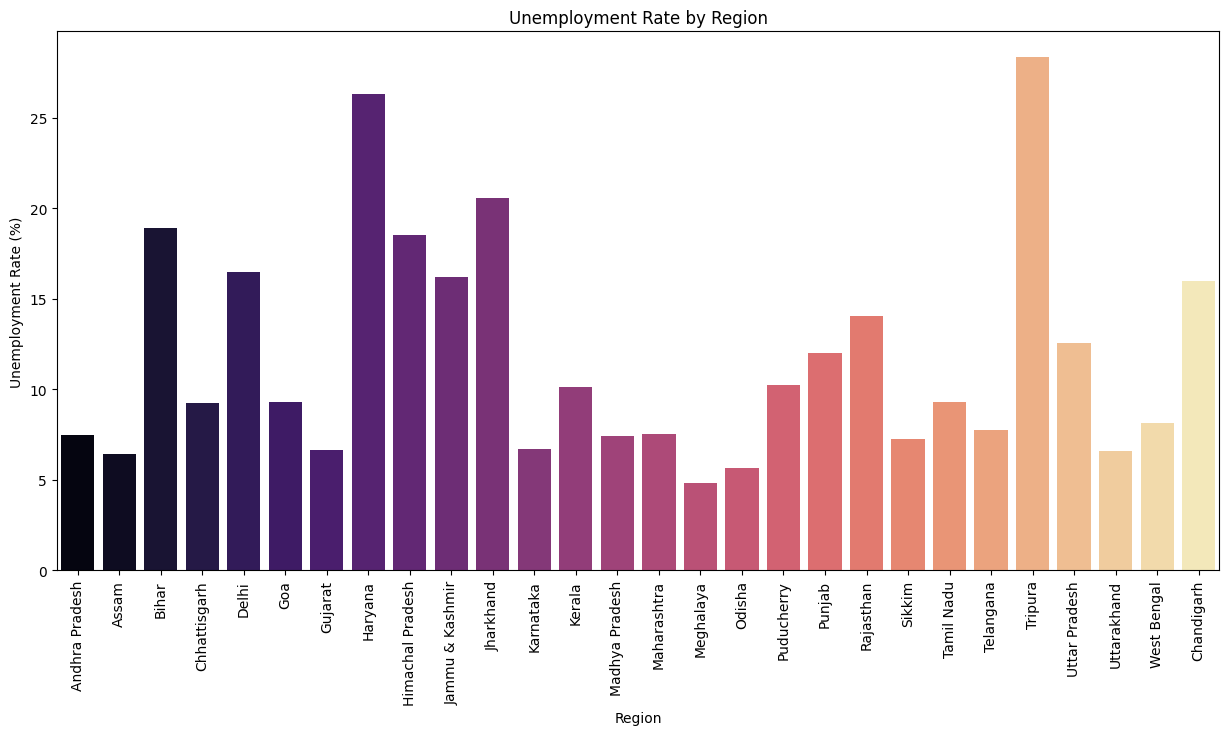

In [29]:

# 1. Unemployment Rate Distribution by Region
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=data1, ci=None, palette="magma")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

<ipython-input-30-75580f3e75a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Estimated Labour Participation Rate (%)", data=data1, palette="Spectral")


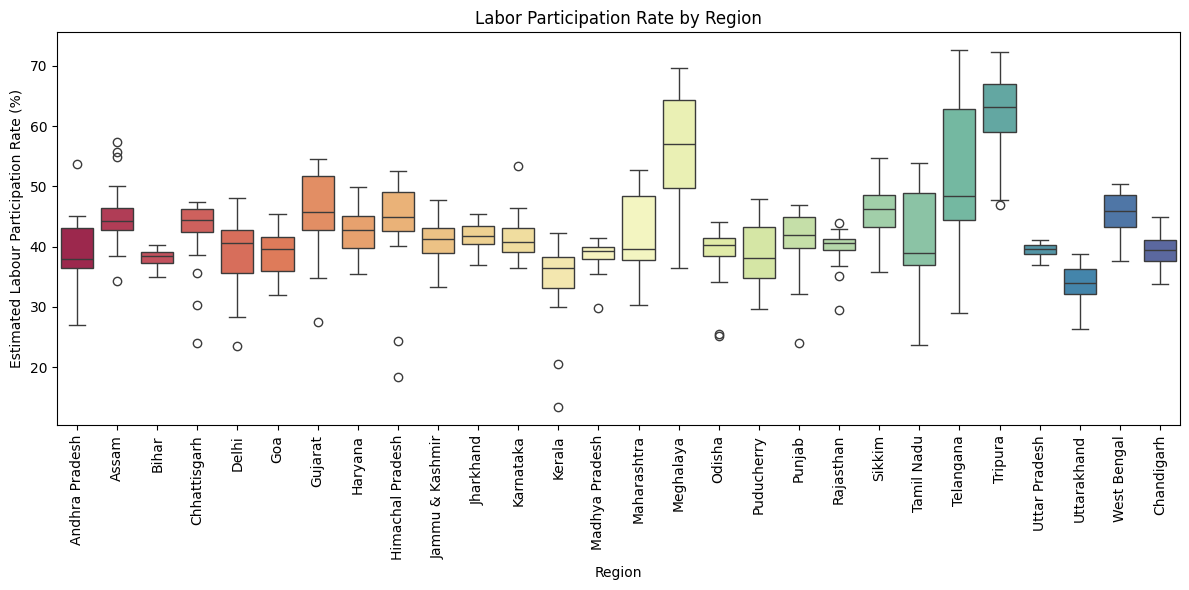

In [30]:
# 2. Box Plot for Labor Participation Rate
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y="Estimated Labour Participation Rate (%)", data=data1, palette="Spectral")
plt.title("Labor Participation Rate by Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
#Average Metrics by Region
avg_metrics = data1.groupby('Region')[['Estimated Unemployment Rate (%)',
                                       'Estimated Labour Participation Rate (%)']].mean()


In [32]:
avg_metrics

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,
Andhra Pradesh,7.477143,39.375714
Assam,6.428077,44.868462
Bihar,18.918214,38.153929
Chandigarh,15.991667,39.336667
Chhattisgarh,9.240357,42.810714
Delhi,16.495357,38.929643
Goa,9.274167,39.249583
Gujarat,6.663929,46.101071
Haryana,26.283214,42.737143


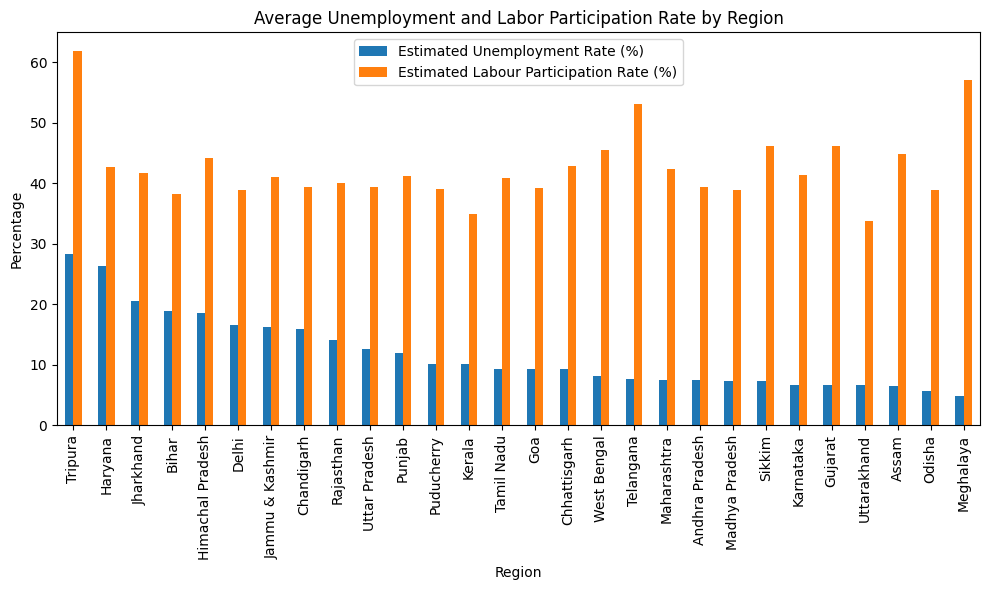

In [33]:
# 3. Average Unemployment Rate Plot
avg_metrics.sort_values(by="Estimated Unemployment Rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

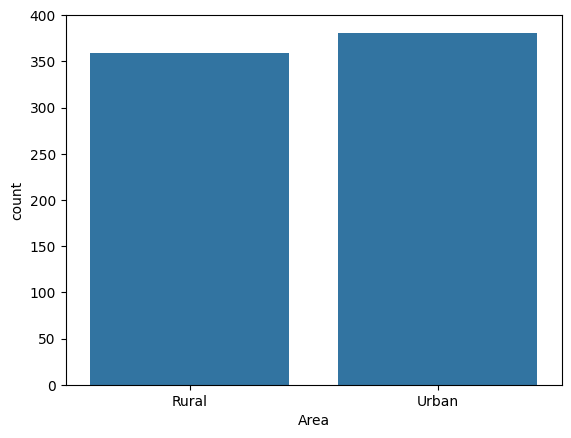

In [34]:
#4. Area-wise Data
data1["Area"].value_counts()
sns.countplot(x="Area",data=data1)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

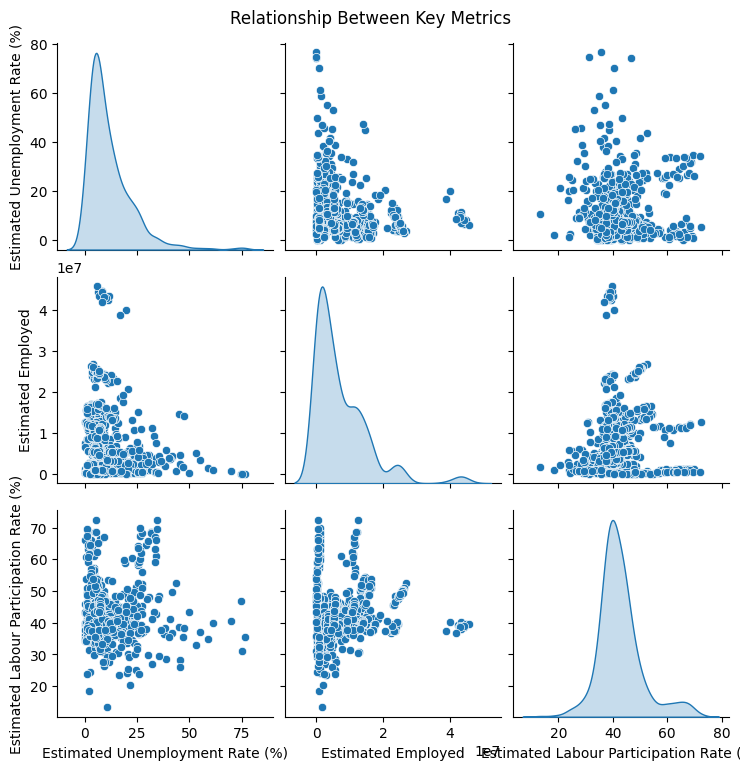

In [35]:
# 5. Pair Plot for Key Metrics
pair_data = data1[["Estimated Unemployment Rate (%)", "Estimated Employed",
                   "Estimated Labour Participation Rate (%)"]]
sns.pairplot(pair_data, diag_kind="kde", palette="husl", markers="o")
plt.suptitle("Relationship Between Key Metrics", y=1.02)
plt.show()

In [36]:
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [37]:
data2.describe

<bound method NDFrame.describe of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0               16635535                                     41.02    South   
1               16545652                                     40.90    South   
2               15881197                                     39.18    South   
3               11336911                                     33.10    South   
4               12988845                                     36.46    South   
..                   ...                                       ...      ...   
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]>

In [38]:
data2.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [39]:
data2.columns = data2.columns.str.strip()


In [40]:
print(data2.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [41]:

data2.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]


In [42]:
data2.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [43]:
# Converting 'Date' column to datetime
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')
data2 = data2.dropna(subset=['Date'])

<ipython-input-43-cdccf52451b0>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce')


In [44]:
# FILTERING DATA FOR THE COVID-19 PERIOD (2020)
covid_data = data2[data2['Date'].dt.year == 2020]


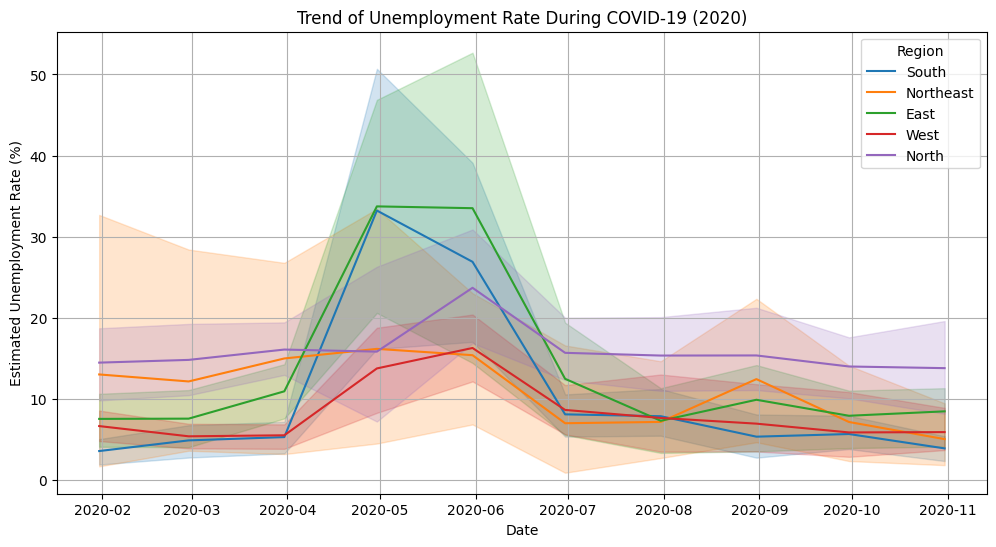

In [45]:
# QUESTION 1: What was the overall trend in unemployment during COVID-19?
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_data, x='Date', y='Estimated Unemployment Rate', hue='Region', palette='tab10')
plt.title("Trend of Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.show()

<ipython-input-46-c3f3c8bc9471>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=covid_data, x='Region', y='Estimated Unemployment Rate', palette='Set2')


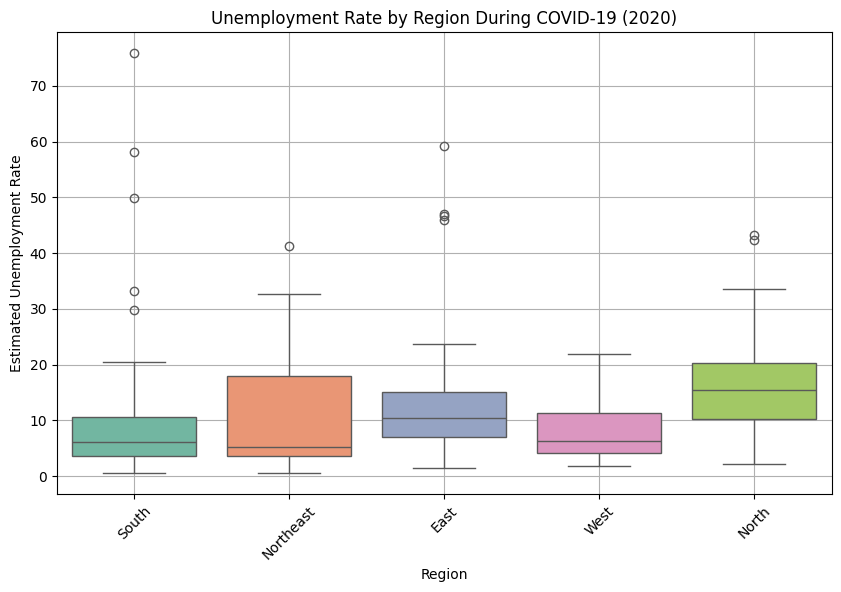

In [46]:
# QUESTION 2: Which regions were most affected during the COVID-19 pandemic?
plt.figure(figsize=(10, 6))
sns.boxplot(data=covid_data, x='Region', y='Estimated Unemployment Rate', palette='Set2')
plt.title("Unemployment Rate by Region During COVID-19 (2020)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

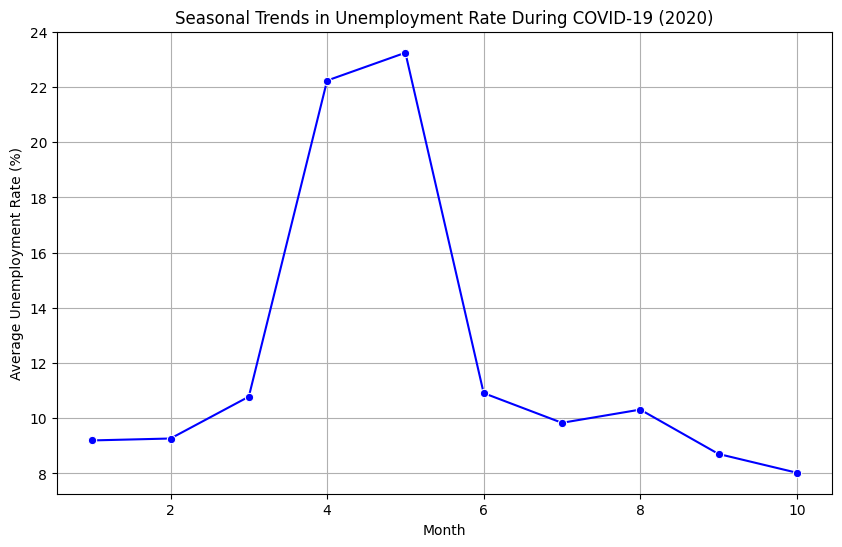

In [47]:
# QUESTION 3: Were there any seasonal trends in unemployment during the pandemic?
covid_data['Month'] = covid_data['Date'].dt.month
monthly_avg = covid_data.groupby('Month')['Estimated Unemployment Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate', data=monthly_avg, marker='o', color='blue')
plt.title("Seasonal Trends in Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.show()

<ipython-input-48-3f904a0e54fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')


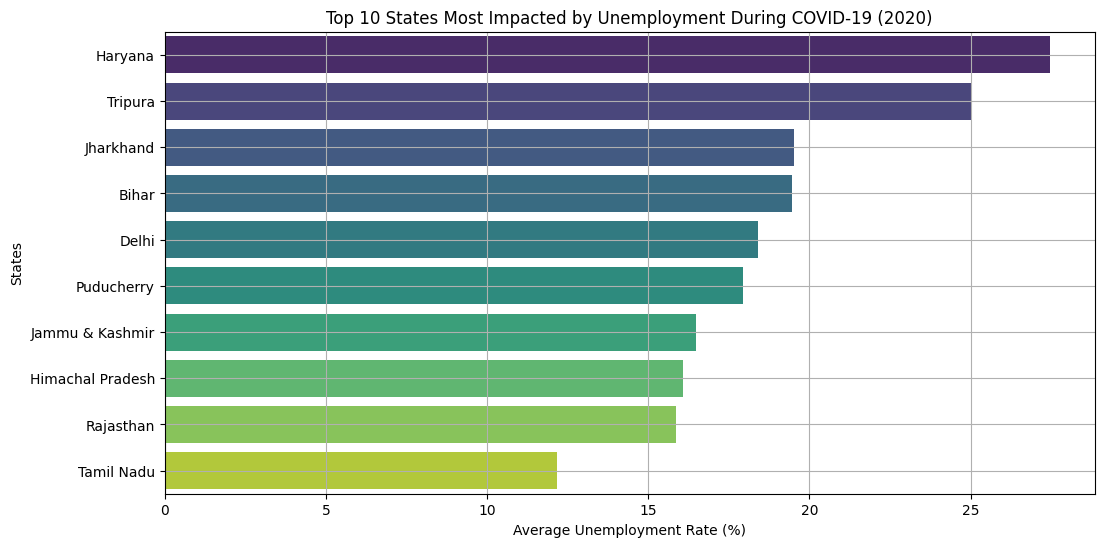

In [48]:
# QUESTION 4: States most impacted by unemployment during COVID-19
state_avg = covid_data.groupby('States')['Estimated Unemployment Rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')
plt.title("Top 10 States Most Impacted by Unemployment During COVID-19 (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("States")
plt.grid(True)
plt.show()